In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import BinaryCrossentropy

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print('TensorFlow Version: ', tf.__version__)
print('Num GPUs Available: ', len(tf.config.experimental.list_physical_devices('GPU')))

TensorFlow Version:  2.17.0
Num GPUs Available:  0


In [3]:
data = pd.read_csv('/content/Customer-Churn-Records.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace = True)


In [5]:
data.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [7]:
cat_col = data.select_dtypes(include='object').columns
cat_col

Index(['Geography', 'Gender', 'Card Type'], dtype='object')

In [8]:
for col in cat_col :
    print(data[col].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


In [9]:
# Transforming the Gender columns
data.Gender = data.Gender.apply(lambda x: x=='Male').astype(int)
data.Gender.unique()

array([0, 1])

In [10]:
order = {'SILVER': 0, 'GOLD': 1, 'PLATINUM': 2, 'DIAMOND': 3}

data['Card Type'] = [order[val] for val in data['Card Type']]
data['Card Type'].unique()

array([3, 1, 0, 2])

In [11]:
dummy_df = pd.get_dummies(data['Geography'])
dummy_df.columns

Index(['France', 'Germany', 'Spain'], dtype='object')

In [12]:
data = pd.concat([data, dummy_df], axis = 1)
data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,France,Germany,Spain
176,510,France,0,30,0,0.00,2,1,1,130553.47,0,0,2,3,430,True,False,False
6418,754,Spain,0,27,8,0.00,2,0,0,121821.16,0,0,3,3,307,False,False,True
6773,625,France,1,43,4,122351.29,1,1,0,71216.60,0,0,4,1,936,True,False,False
9793,772,Germany,0,42,0,101979.16,1,1,0,90928.48,0,0,4,1,612,False,True,False
8591,678,Spain,0,39,6,0.00,1,0,1,185366.56,0,0,4,1,965,False,False,True


In [13]:
data.shape

(10000, 18)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  int64  
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  int64  
 14  Point Earned        10000 non-null  int64  
 15  France              10000 non-null  bool   
 16  Germa

In [15]:
data.rename(columns = {'Card Type':'CardType', 'Satisfaction Score': 'SatisfactionScore', 'Point Earned': 'PointsEarned'}, inplace = True)

In [16]:
data.drop('Geography', axis = 1, inplace =True)
data.shape

(10000, 17)

In [17]:
tar_col = 'Exited'
cols = data.columns.tolist()
cols.remove(tar_col)
len(cols)

16

In [18]:
cols, tar_col

(['CreditScore',
  'Gender',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary',
  'Complain',
  'SatisfactionScore',
  'CardType',
  'PointsEarned',
  'France',
  'Germany',
  'Spain'],
 'Exited')

<Axes: xlabel='Exited', ylabel='count'>

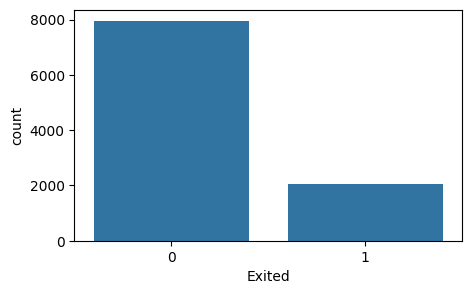

In [19]:
plt.figure(figsize = (5,3))
sns.countplot(data = data,  x = tar_col)

In [20]:
scaler = StandardScaler()
x = scaler.fit_transform(data[cols])
x

array([[-0.32622142, -1.09598752,  0.29351742, ...,  0.99720391,
        -0.57873591, -0.57380915],
       [-0.44003595, -1.09598752,  0.19816383, ..., -1.00280393,
        -0.57873591,  1.74273971],
       [-1.53679418, -1.09598752,  0.29351742, ...,  0.99720391,
        -0.57873591, -0.57380915],
       ...,
       [ 0.60498839, -1.09598752, -0.27860412, ...,  0.99720391,
        -0.57873591, -0.57380915],
       [ 1.25683526,  0.91241915,  0.29351742, ..., -1.00280393,
         1.72790383, -0.57380915],
       [ 1.46377078, -1.09598752, -1.04143285, ...,  0.99720391,
        -0.57873591, -0.57380915]])

In [21]:
y = data[tar_col]
x.shape, y.shape

((10000, 16), (10000,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape

((8000, 16), (8000,), (2000, 16))

In [23]:
model = MLPClassifier(hidden_layer_sizes=(8) , max_iter=110 , alpha=1e-4, solver='sgd', random_state=1
                     ,verbose=True , learning_rate_init=.1 ).fit(X_train, y_train)

Iteration 1, loss = 0.16922452
Iteration 2, loss = 0.01082449
Iteration 3, loss = 0.00965484
Iteration 4, loss = 0.00928007
Iteration 5, loss = 0.00908717
Iteration 6, loss = 0.00898461
Iteration 7, loss = 0.00880104
Iteration 8, loss = 0.00867034
Iteration 9, loss = 0.00855761
Iteration 10, loss = 0.00843940
Iteration 11, loss = 0.00836452
Iteration 12, loss = 0.00829476
Iteration 13, loss = 0.00814179
Iteration 14, loss = 0.00810178
Iteration 15, loss = 0.00795289
Iteration 16, loss = 0.00793270
Iteration 17, loss = 0.00784986
Iteration 18, loss = 0.00778744
Iteration 19, loss = 0.00768003
Iteration 20, loss = 0.00774055
Iteration 21, loss = 0.00757948
Iteration 22, loss = 0.00754759
Iteration 23, loss = 0.00738843
Iteration 24, loss = 0.00741180
Iteration 25, loss = 0.00732742
Iteration 26, loss = 0.00730689
Iteration 27, loss = 0.00721005
Iteration 28, loss = 0.00711686
Iteration 29, loss = 0.00717473
Iteration 30, loss = 0.00706443
Iteration 31, loss = 0.00699970
Iteration 32, los

In [24]:
y_pred = model.predict(X_test)

In [25]:
print("========================================")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("========================================")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("========================================")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1606    1]
 [   1  392]]


In [26]:
model = Sequential([
    Input((X_train.shape[1],)),
    Dense(16, activation = 'relu'),
    Dense(8, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

In [27]:
model.compile(
    loss = BinaryCrossentropy(),
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [28]:
history = model.fit(X_train, y_train, epochs = 25, batch_size = 40, validation_data = (X_test, y_test))

Epoch 1/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7575 - loss: 0.5201 - val_accuracy: 0.9720 - val_loss: 0.1484
Epoch 2/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9815 - loss: 0.1010 - val_accuracy: 0.9985 - val_loss: 0.0249
Epoch 3/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9983 - loss: 0.0208 - val_accuracy: 0.9990 - val_loss: 0.0123
Epoch 4/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9987 - loss: 0.0123 - val_accuracy: 0.9990 - val_loss: 0.0095
Epoch 5/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9977 - loss: 0.0144 - val_accuracy: 0.9990 - val_loss: 0.0085
Epoch 6/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9985 - loss: 0.0105 - val_accuracy: 0.9990 - val_loss: 0.0082
Epoch 7/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9986 - loss: 0.0090 - val_accuracy: 0.9990 - val_loss: 0.0081
Epoch 8/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9980 - loss: 0.0117 - val_accuracy: 0.

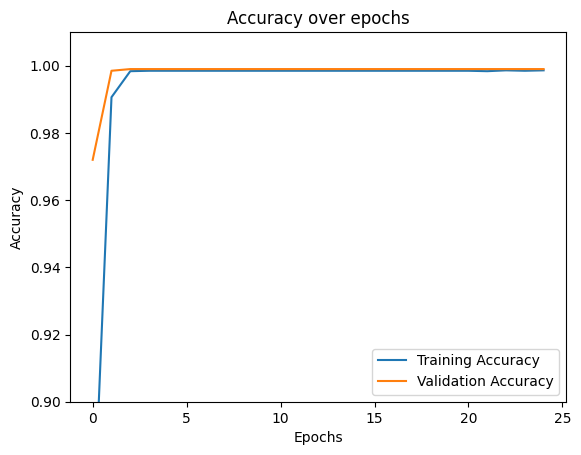

In [29]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.9,1.01)
plt.legend()
plt.show()

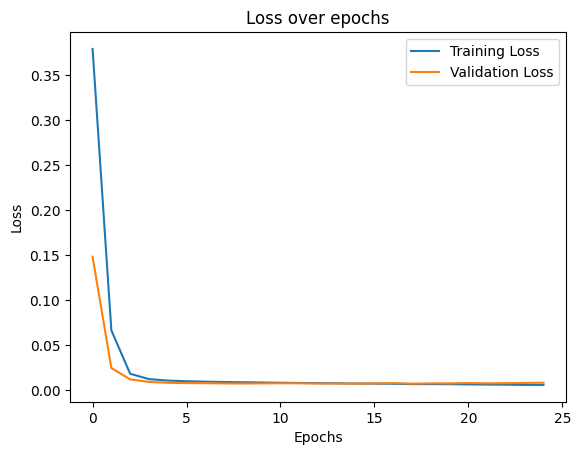

In [30]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

report = classification_report(y_test, y_pred, target_names=['Not Exited', 'Exited'])

print(report)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

  Not Exited       1.00      1.00      1.00      1607
      Exited       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC: 0.999545563224506


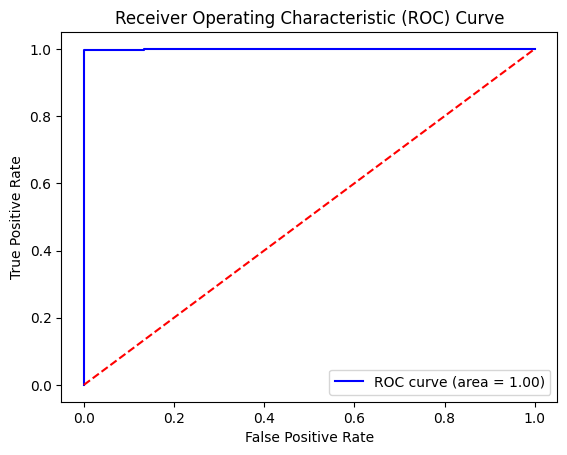

In [32]:
y_pred_proba = model.predict(X_test).ravel()

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()